In [52]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from skimage.util import random_noise
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter
# from scipy.signal import correlate2d
from scipy.ndimage import correlate, convolve
from scipy.io import loadmat
from skimage.feature import match_template
from matplotlib.patches import Rectangle
# ONly if you have jupyter themes
from jupyterthemes import jtplot
jtplot.style()

In [53]:
plots = lambda rows=1, cols=1, figsize=(20,10): plt.subplots(rows, cols, figsize=(figsize))
GREY = plt.cm.gray
REDS = plt.cm.RdBu
GREENS = plt.cm.Greens
BLUES = plt.cm.Blues

In [54]:
flag2 = (imread('images_class/Mexican_flag.png'))[..., :3]
def imshow_color(image, size=(8, 8)):
    f, a = plots(figsize=size)
    a.imshow(image), a.axis('off')
    plt.show()
    


In [55]:
flag2.shape

(220, 400, 3)

In [56]:
flag = flag2[10:-10, 25:-25]

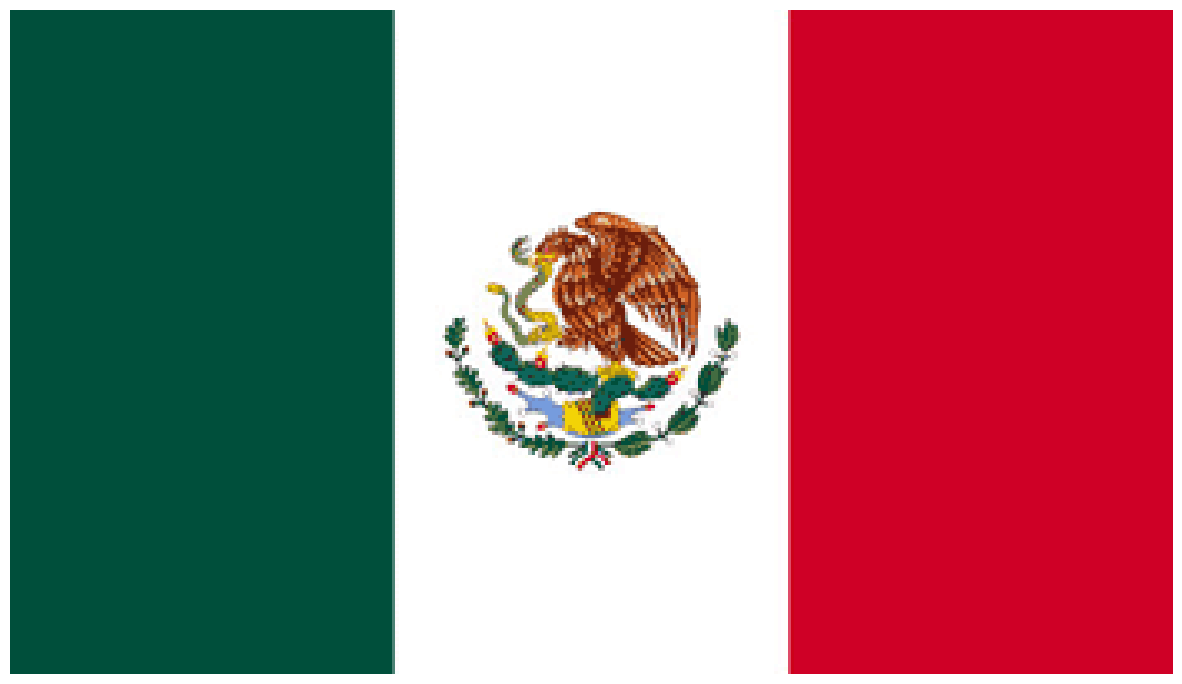

In [57]:
imshow_color(flag, (15, 15))

In [58]:
flag.shape

(200, 350, 3)

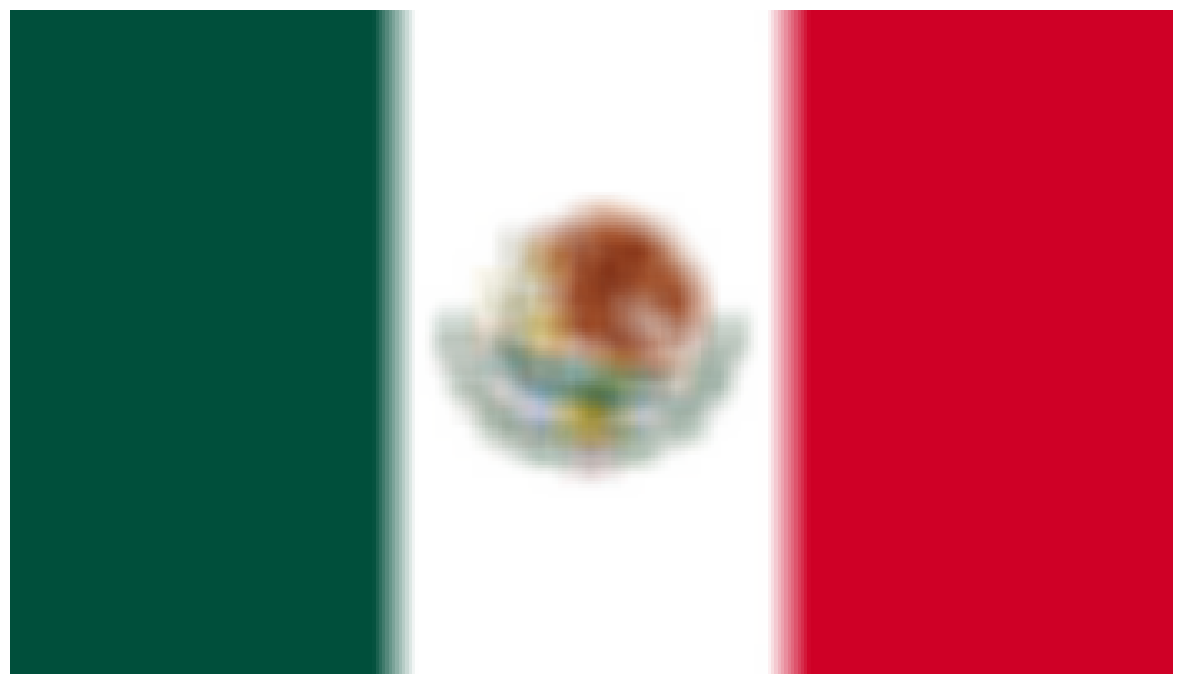

In [59]:
# apply uniform filter
filtered_flag = uniform_filter(flag, size=(13, 13, 1))
imshow_color(filtered_flag, (15,15))

In [60]:
#create manual filter
box_filter = 1/121 * np.ones((11,11,1))

In [61]:
f2 = correlate(flag, box_filter, mode='wrap')

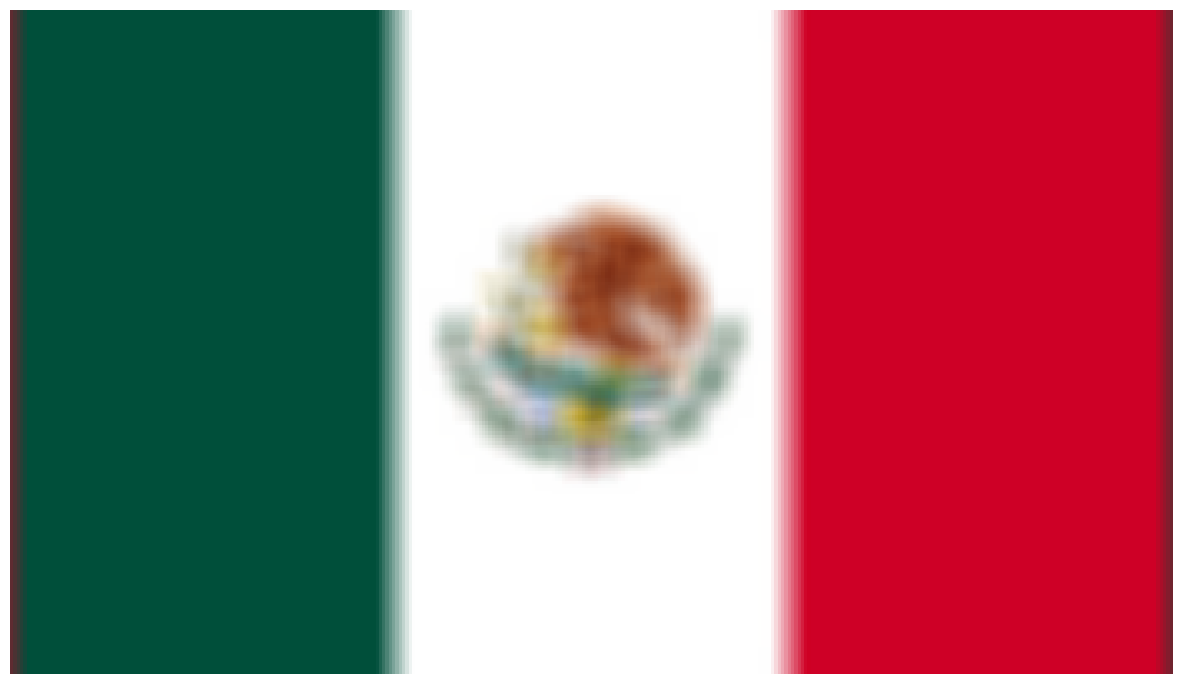

In [62]:
imshow_color(f2, (15,15))

In [63]:
def gaussian_kernel(size=(3,3), sigma=1):
    rows, cols = (size[0]-1)/2, (size[1]-1)/2
    r, c = np.mgrid[-rows:rows+1, -cols:cols+1]

    squares = r**2 + c**2
    f = np.exp(-squares/(2*sigma**2))
    #add extra axis for color filter, not needed for grayscale
    return f[..., None]/f.sum()

In [64]:
gauss_filt = gaussian_kernel(size=(11,11,1), sigma=2)

In [65]:
f3 = correlate(flag, gauss_filt, mode='constant')

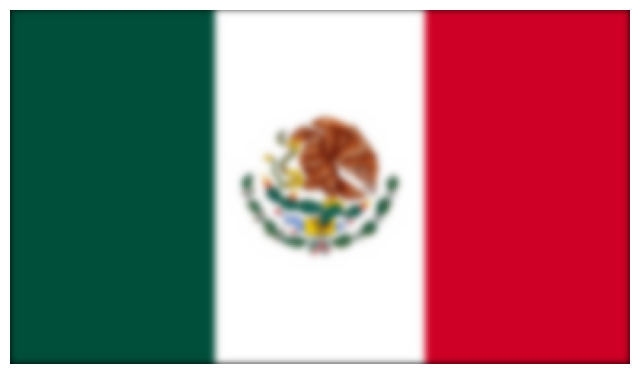

In [66]:
imshow_color(f3)

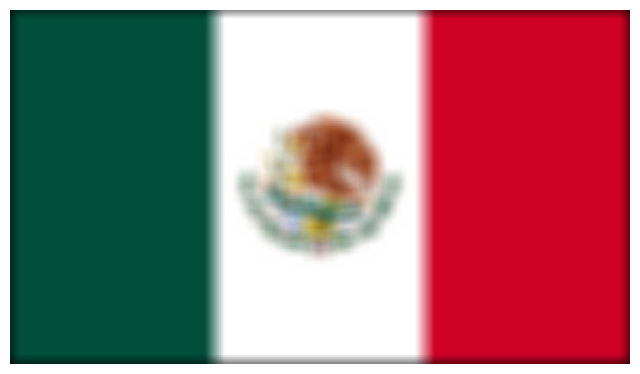

In [67]:
# convolution
#convolution
f4 = convolve(flag, box_filter, mode='constant')
imshow_color(f4)

In [68]:
#trying with impulse
impulse = np.zeros((3,3,1))
impulse[1,1,:] = 1

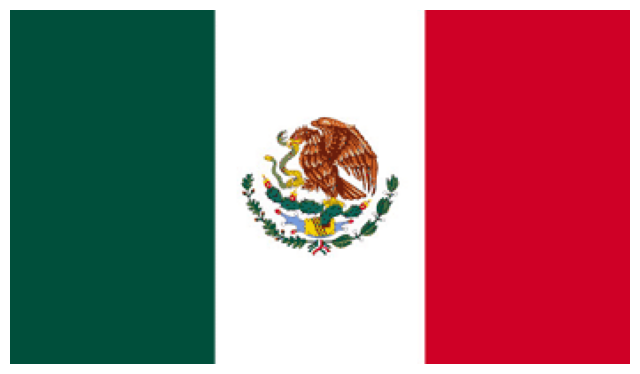

In [69]:
filt_impulse = correlate(flag, impulse)
imshow_color(filt_impulse)

In [70]:
impulse2 = np.zeros((11,11))
impulse2[5,5] = 1
aux_array = np.random.randint(0,100, (3,3))
print(aux_array)
print(impulse2)

[[41 92 16]
 [62 83 90]
 [63 68 90]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [71]:
f5=correlate(impulse2, aux_array,mode="constant")
print(f5)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 90. 68. 63.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 90. 83. 62.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 16. 92. 41.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [72]:
f6=convolve(impulse2, aux_array, mode='constant')
print(f6)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 41. 92. 16.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 62. 83. 90.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 63. 68. 90.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


### Matching pattern

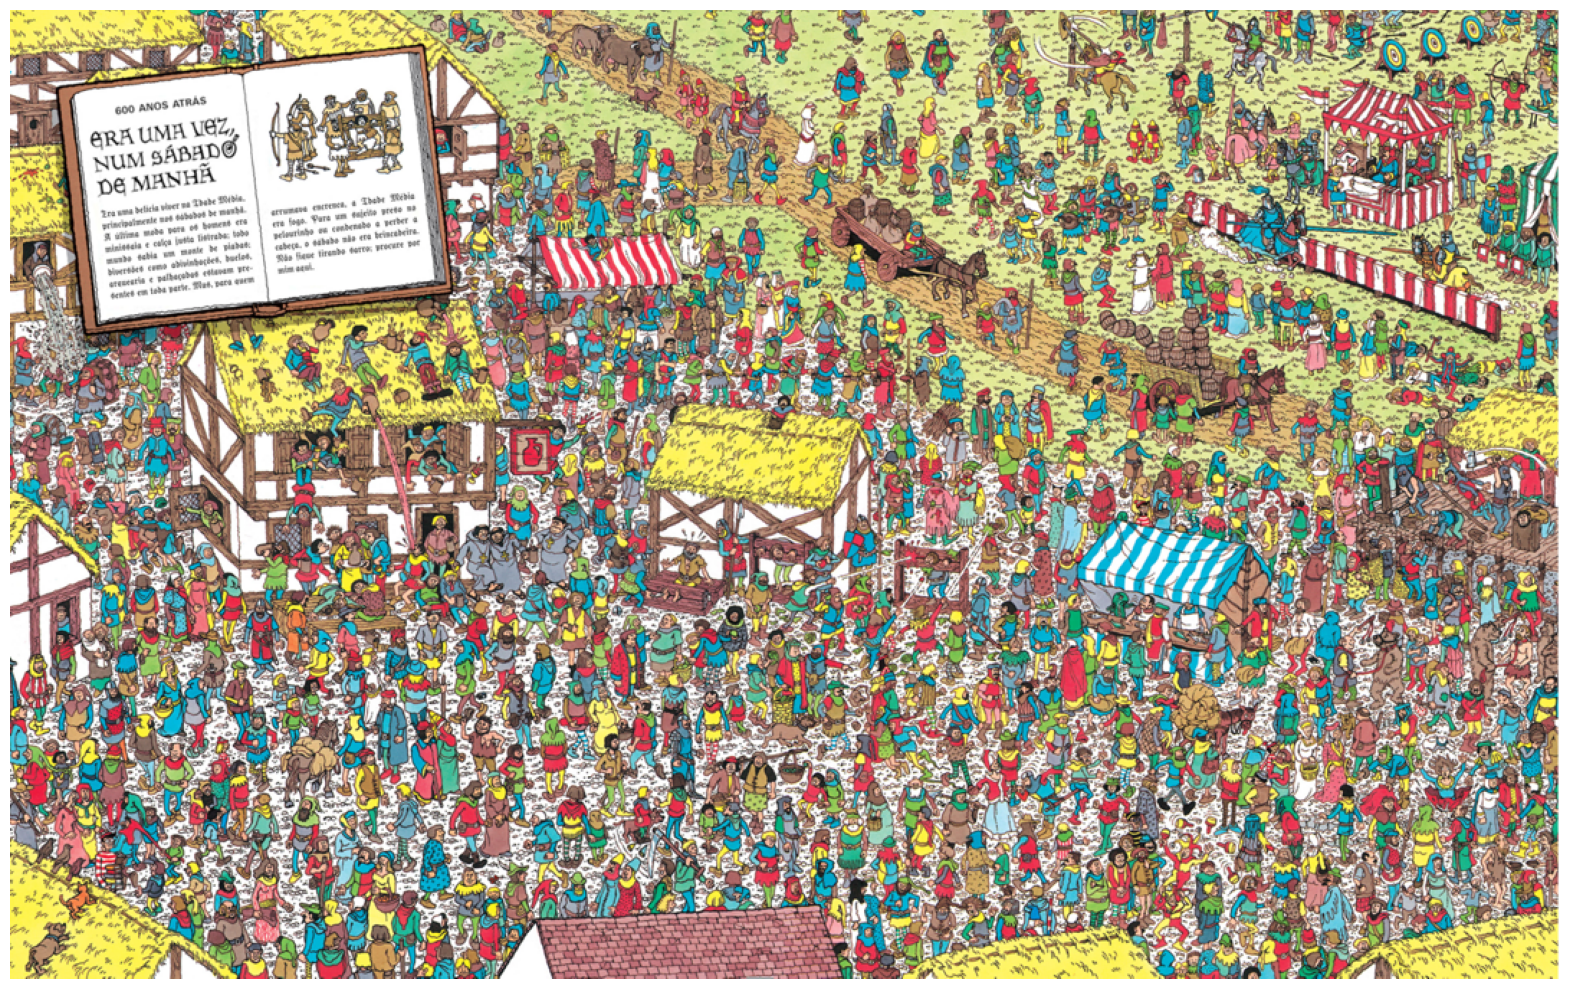

In [73]:
pattern1 = loadmat('images_class/waldoExample2.mat')
p1 = pattern1['waldo']
imshow_color(p1,(20,20))

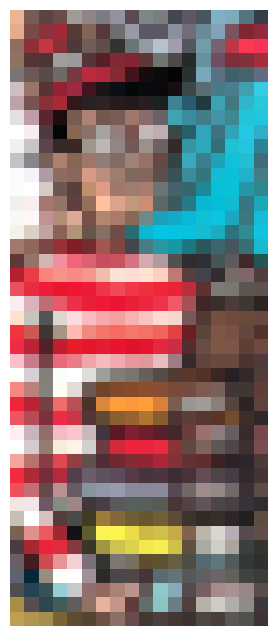

In [131]:
p2 = pattern1['extract']
imshow_color(p2)

In [75]:
waldo = rgb2gray(p1)
patt = rgb2gray(p2)

In [76]:
#Bastián Andrés Carrasco Espinoza A01761668
#Samantha Daniela Guanipa Ugas A01703936
#Cesar Alonso Álvarez Rojas A01761589
#Carlos Nicolás Ávila Amigo A01761673
#Edgar Alexander Carrizalez Lerín A01024901

In [163]:
#############################
##         ERRONEO         ##
#############################
#Primero intentamos hacer una ventana movil obteniendo una columna de 
#comparacion para la imagen sin embargo no funciono y decidimos ir por un metodo 
#mas simple pero algo crudo ya que nos agrega lineas de codigo. Esta version tarda mucho 
#y además por algun motivo se equivoca en cuanto a las cordenadas 

def find_waldo(img, path): 
    h = len(img)
    w = len(img[0])
    
    h1 = len(path)
    w1 = len(path[0])
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    posh = 0
    posw = 0
    
    for i in range (h - h1 + 1):
        for j in range (w - w1 + 1):
            win = [row[j:j+w1] for row in img[i:i+h1]]
            if (win - path).any():
                posh = i
                posw = j
                
    print ("Pos I: " + str(i))
    print ("Pos J: " + str(j))
            
    waldo = Rectangle((posw, posh), w1, h1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(waldo)
    plt.show()                     
    

In [164]:
#Bastián Andrés Carrasco Espinoza A01761668
#Samantha Daniela Guanipa Ugas A01703936
#Cesar Alonso Álvarez Rojas A01761589
#Carlos Nicolás Ávila Amigo A01761673
#Edgar Alexander Carrizalez Lerín A01024901

In [165]:
#############################
##         Correcto        ##
#############################


#Este metodo pese a ser más lineas de codigo el usar las conficionales lo hace más rapido ya que va
#descartando casos en el arreglo, buscando el valor del primer pixel de la matris del path 
#para acercarse cada vez más a waldo, en el caso que es poco probable que se repita un patron, en caso 
#de que se necesite algo más acertado se puede agregar más condicionales o una ventana movil despues de 
#haber encontrado cierto numero de pixeles en secuencia 

def find_waldo1(img, path):
    h , w = len(img) , len(img[0])
    
    h1 , w1 = len(path) , len(path[0])
    
    fig, ax = plt.subplots()
    
    ax.imshow(img)
    
    posh = 0
    posw = 0
    
    for i in range (h):
        for j in range (w):
            if (img[i][j] == path[0][0]):
                if (img[i][j+1] == path[0][1]):
                    if (img[i][j+2] == path[0][2]):
                        if (img[i][j+3] == path[0][3]):
                            posh = i
                            posw = j
                
                
    print ("Pos I: " + str(i))
    print ("Pos J: " + str(j))
    
            
    waldo = Rectangle((posw, posh), w1, h1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(waldo)
    plt.show()                     

Pos I: 673
Pos J: 1077


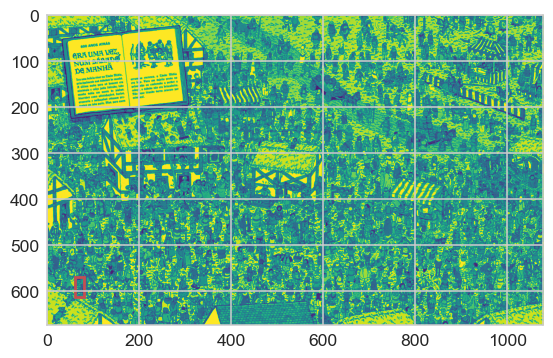

In [167]:
#Find Waldo Activity Correct 
find_waldo1(waldo,patt)

In [ ]:
#Metodo erroneo 
find_waldo(waldo,patt)